In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_URL = '/content/drive/MyDrive/Project/Datasets/GrammarandProductReviews_1.csv'

In [ ]:
data = pd.read_csv(DATA_URL)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22996 entries, 0 to 22995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          22996 non-null  int64 
 1   id                  22996 non-null  object
 2   brand               22996 non-null  object
 3   categories          22996 non-null  object
 4   dateAdded           22996 non-null  object
 5   dateUpdated         22996 non-null  object
 6   keys                22996 non-null  object
 7   manufacturer        22855 non-null  object
 8   manufacturerNumber  22978 non-null  object
 9   name                22996 non-null  object
 10  reviews.dateAdded   22996 non-null  object
 11  Purchase            14646 non-null  object
 12  Recommendation      21002 non-null  object
 13  rating              22996 non-null  int64 
 14  reviews             22996 non-null  object
 15  title               22856 non-null  object
 16  username            22

In [ ]:
data.isnull().sum()

Unnamed: 0               0
id                       0
brand                    0
categories               0
dateAdded                0
dateUpdated              0
keys                     0
manufacturer           141
manufacturerNumber      18
name                     0
reviews.dateAdded        0
Purchase              8350
Recommendation        1994
rating                   0
reviews                  0
title                  140
username                51
dtype: int64

In [ ]:
data = data.dropna(subset=['reviews'])

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.barplot(x=data['reviews'].value_counts().index , y=data['reviews'].value_counts())
ax.set(xlabel="Review Ratings", ylabel = "Rating count")

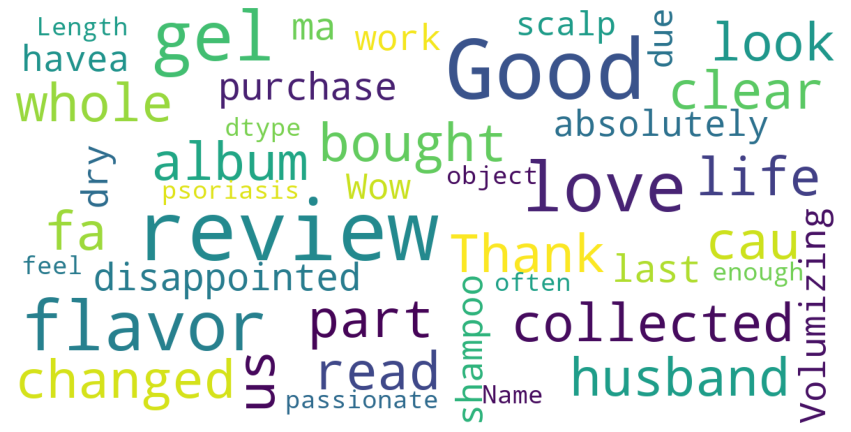

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data['reviews'])

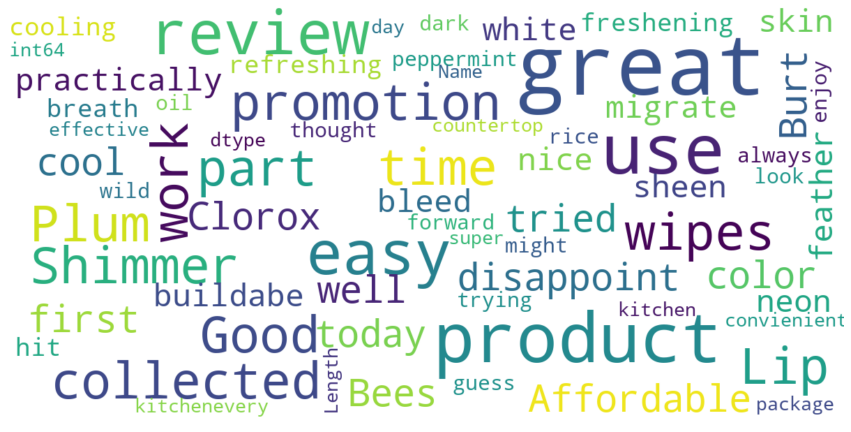

In [ ]:
# alternate code, seems to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=3,
        random_state=1).generate(str(data['reviews'].value_counts()))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

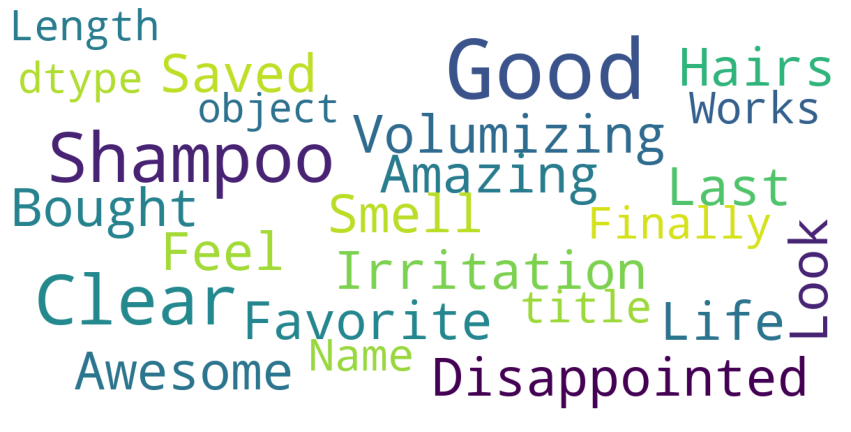

In [ ]:
show_wordcloud(data['title'])

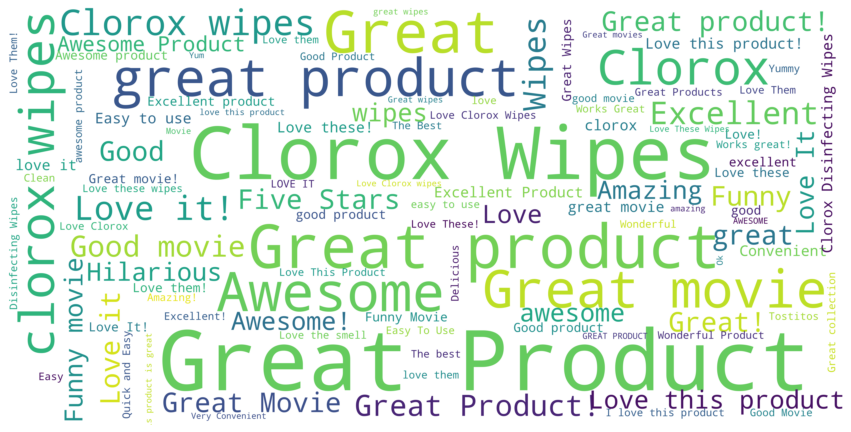

In [ ]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=400, max_font_size=40, scale=30,
        random_state=1).generate_from_frequencies((data['title'].value_counts()  ))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

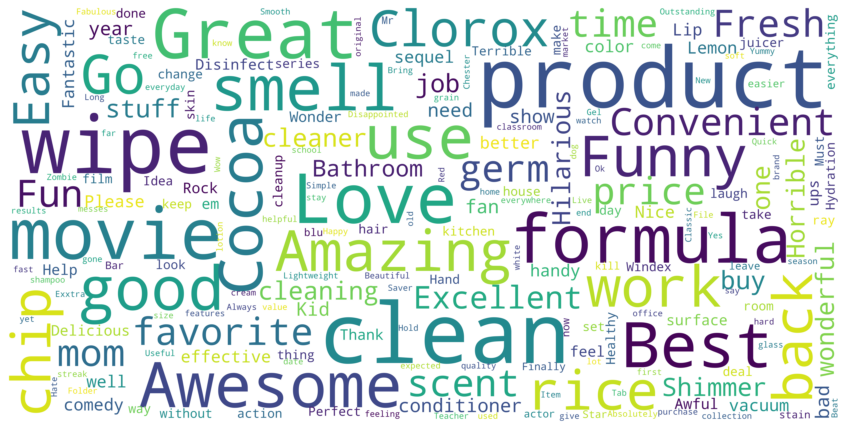

In [ ]:
split_title = []
listCounts = []
split_title = [x.split(" ") for x in data['title'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
len(big_list)

73303

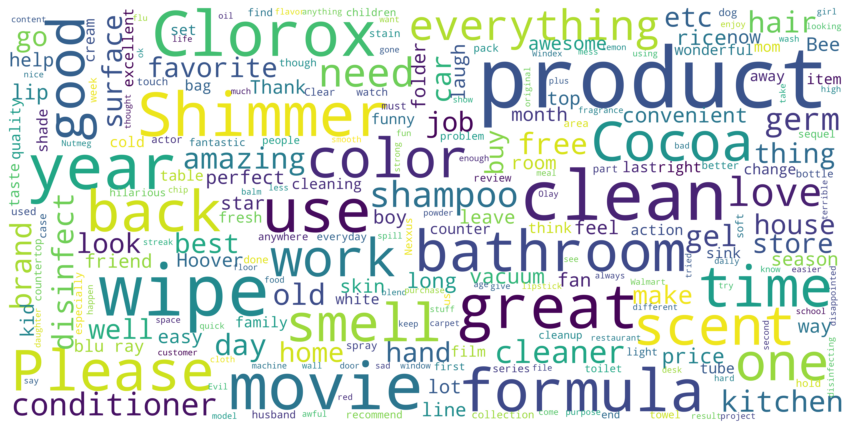

In [ ]:
split_title = []
listCounts = []
split_title = [x.split(" ") for x in data['reviews'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
data['Purchase'].fillna('Null', inplace=True)

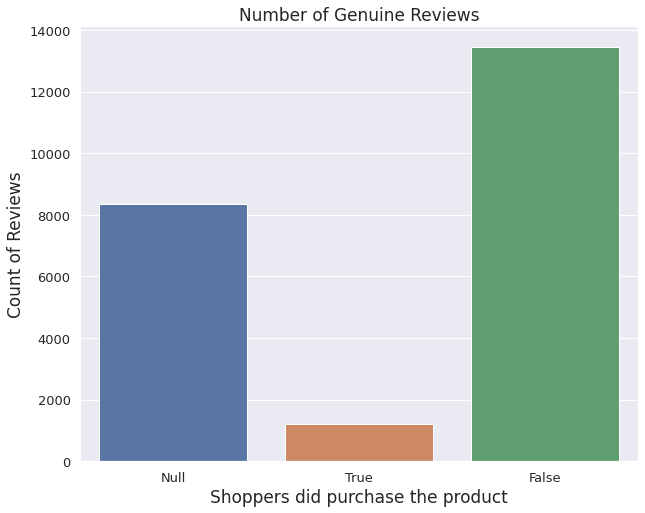

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data['Purchase'])
ax.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of Genuine Reviews', fontsize=17)
ax.tick_params(labelsize=13)

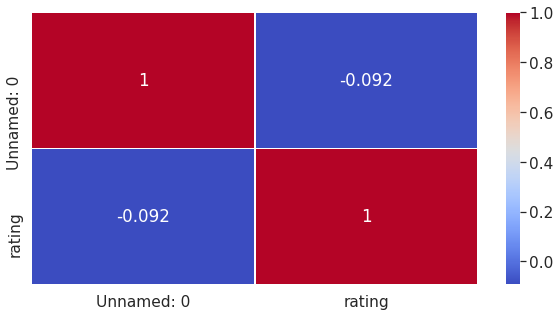

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True,linewidths=.5)

In [ ]:
# MOST POPULAR PRODUCT PURCHASED
df1 = data[data['Purchase'] == True]
df1['name'].value_counts()

Hormel Chili, No Beans                                   91
Coty Airspun Face Powder, Translucent Extra Coverage     88
Chester's Cheese Flavored Puffcorn Snacks                79
Tostitos Bite Size Tortilla Chips                        60
Lysol Concentrate Deodorizing Cleaner, Original Scent    56
                                                         ..
42 Dual Drop Leaf Table with 2 Madrid Chairs"             1
2x Ultra Era with Oxi Booster, 50fl oz                    1
Suave Professionals Hair Conditioner, Sleek               1
Heiress (dvd)                                             1
Fantasy Fields Lil' Sports Fan Step Stool - Teamson       1
Name: name, Length: 122, dtype: int64

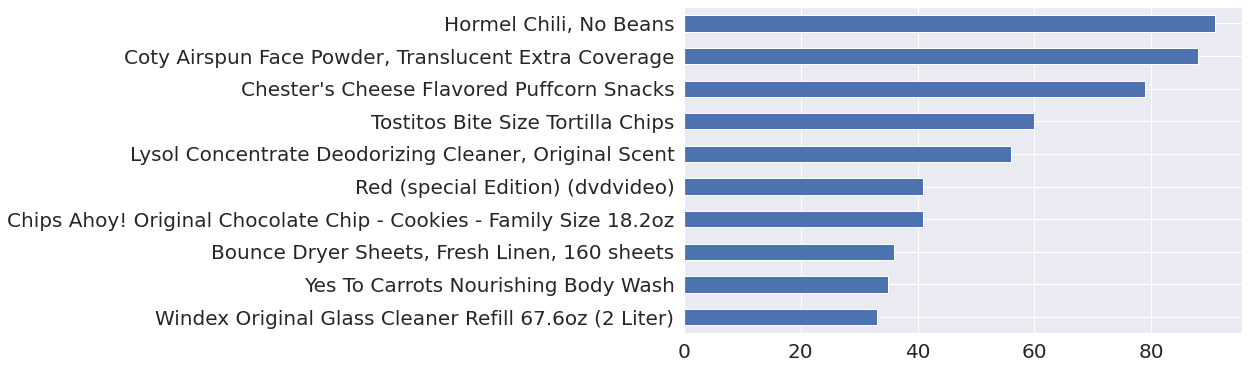

In [ ]:
df1['name'].value_counts()[0:10].plot(kind='barh', figsize=[10,6], fontsize=20).invert_yaxis()

In [ ]:
# filter most purchased product with 5 star rating
df1 = df1[df1['name'] == 'The Foodsaver174 10 Cup Fresh Container - Fac10-000']
df2 = df1[df1['reviews.rating']==5]
df2 = df2[[ 'reviews.rating', 'reviews.text']]
df2

In [ ]:
df2.to_csv('Foodsaver_5.csv', index = False)

In [ ]:
df1 = df1[df1['reviews.rating']==1]
df1 = df1[[ 'reviews.rating', 'reviews']]
df1

In [ ]:
df1.to_csv('Foodsaver_1.csv', index = False)

In [ ]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

all_text=data['reviews']
# train_text=df['reviews.text']
y=data['reviews']

In [ ]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3) )
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.fit_transform(all_text)

In [ ]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.fit_transform(all_text)

train_features = hstack([train_char_features, train_word_features])

In [ ]:
import time 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
seed = 71

X_train, X_test, y_train, y_test = train_test_split(train_features, y, test_size=0.3, random_state=seed)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (16097, 455091)
y_train (16097,)
X_test (6899, 455091)
y_test (6899,)


## Model Testing

### Random Forest Classifier

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
time1 = time.time()

classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=seed, n_jobs=-1)
classifier = RandomForestClassifier(random_state=seed, n_jobs=-1)
classifier.fit(X_train,y_train)
preds1 = classifier.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

In [ ]:
print("Random Forest Model accuracy", accuracy_score(preds1, y_test))
print(classification_report(preds1, y_test))
print(confusion_matrix(preds1, y_test))

### XGBoost

In [ ]:
%%time 
import xgboost as xgb
time1 = time.time()

xgb = xgb.XGBClassifier(n_jobs=-1)
xgb.fit(X_train,y_train)
preds2 = xgb.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

In [ ]:
for i in range(100):
    if preds2[i] == np.array(y_test)[i]:
        print('1', end=', ')
    else:
        print('0', end=', ')

In [ ]:
correct = 0
wrong = 0
for i in range(21303):
    if preds2[i] == np.array(y_test)[i]:
        correct += 1
    else:
        wrong += 1
print(correct+wrong)
print(correct/21303)

In [ ]:
print("XGBoost Model accuracy", accuracy_score(preds2, np.array(y_test)))

In [ ]:

print("XGBoost Model accuracy", accuracy_score(preds2, y_test))
print(classification_report(preds2, y_test))
print(confusion_matrix(preds2, y_test))

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
%%time 
import time
time1 = time.time()

logit = LogisticRegression(C=1, multi_class='ovr')
logit.fit(X_train,y_train)
preds3 = logit.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

In [ ]:
print("Logistic Regression accuracy", accuracy_score(preds3, y_test))
print(classification_report(preds3, y_test))
print(confusion_matrix(preds3, y_test))

### LSTM Model

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [ ]:
pip install vaderSentiment

In [ ]:
#Vader
import numpy as np
import pandas as pd

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as sia 
df = pd.read_csv('/content/drive/MyDrive/Project/Datasets/GrammarandProductReviews.csv')
positivity=[]
negativity=[]
overall_sentiment=[]

sid_obj=sia()

for review in df["reviews.text"]:
    sentiment_dict = sid_obj.polarity_scores(df)
    positivity.append(sentiment_dict['pos'])
    negativity.append(sentiment_dict['neg'])
    overall_sentiment.append('pos' if sentiment_dict['pos']> sentiment_dict['neg'] else 'neg' if sentiment_dict['pos']<sentiment_dict['neg'] else 'pos')

df.insert(2,'Pos',positivity)
df.insert(3,'Neg',negativity)
df.insert(4,'Senti',overall_sentiment)

In [ ]:
#df['reviews.text']= [x.lower() for x in df['reviews.text']]
#df['reviews.text'] = df['reviews.text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [ ]:
for idx,row in df.iterrows():
    row[0] = row[0].replace('rt',' ')

In [ ]:
tokenizer = Tokenizer(nb_words=2000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                   lower=True,split=' ')
data = data.astype({"reviews.text":str})
tokenizer.fit_on_texts(data['reviews.text'].values)

In [ ]:
X = tokenizer.texts_to_sequences(data['reviews.text'].values)
X = pad_sequences(X)

In [ ]:
pip install Sequential

In [ ]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
embed_dim = 128
lstm_out = 196
batch_size = 32
dropout = 0.3

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(2000, embed_dim,input_length = X_train.shape[1]))
model.add(LSTM(lstm_out))
model.add(Dense(2,activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4, clipvalue=1.0),loss= tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 1346053, 128)      256000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_features, y, test_size=0.3, random_state=seed)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(49705, 1346053) (49705,)
(21303, 1346053) (21303,)


In [ ]:
y_train = to_categorical(y_train, 6)
y_test = to_categorical(y_test, 6)

In [ ]:
X.shape
y.shape

(71008,)

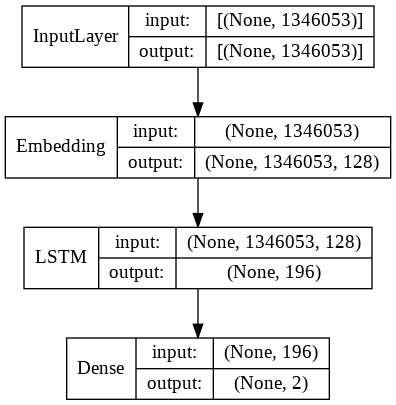

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes = True, show_layer_names=False)

In [ ]:
X_train= np.asarray(X_train).astype('float32').reshape((-1,1))
Y_train= np.asarray(y_train).astype('float32').reshape((-1,1))

In [ ]:
model.fit(X_train,Y_train,epochs=10,verbose=2)

LSTM with Attention Model

In [ ]:
from keras.layers import Layer
import keras.backend as K

In [ ]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self,**kwargs):
        return super(attention,self).get_config(**kwargs)

In [ ]:
pip install features

In [ ]:
import tensorflow as tf
import numpy as np
import features
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation 
from keras.optimizers import SGD
from keras.layers import Input, Dense, LSTM 
from keras.layers.embeddings import Embedding 
from keras.layers.merge import Concatenate
from keras.models import Model
from keras.utils import plot_model

max_len = 32
inputs=Input(shape = (max_len))
vocab_length =2000
ATM = Embedding(input_dim=vocab_length+1,
                output_dim=128,
                input_length=features,
            embeddings_regularizer = tf.keras.regularizers.l2(.001))(inputs)
att_in=LSTM(lstm_out,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(ATM)
att_out=attention()(att_in)
outputs=Dense(2,activation='sigmoid',trainable=True)(att_out)
model=Model(inputs,outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 32, 128)           256128    
_________________________________________________________________
lstm_6 (LSTM)                (None, 32, 196)           254800    
_________________________________________________________________
attention (attention)        (None, 196)               228       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 394       
Total params: 511,550
Trainable params: 511,550
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4, clipvalue=1.0),loss= tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])
batch_size = 100
model.fit(X_train,y_train,epochs=10,verbose=2,shuffle=True,)

In [ ]:
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)
print("Score: %.2f" % (score))
print("Att_ model Validation Accuracy: %.2f" % (acc))